# Linear Regression: the Bread and Butter

## Introduction

Machine learning is a (very effective) method to solve the following problem: given some data expressing some phenomenon, how might I create a model that will correctly predict the phenomenon when it is fed data that is *outside* my initial data set? Most times, this is far from an easy task. But it is very easy when we can see the data satisfies some sort of linear relation. Say we'd like to predict a variable $y$ and we expect it to be close to some linear function of a variable $x$, then, we'd like to find $w_0, w_1$ such that the approximation $\hat y = w_0 + w_1 x$ is good, e.g. $|\hat y - y|$ is fairly small.

Finding such optimal $w_0$ and $w_1$ given a dataset is a problem that was solved long ago -- but at its core lie the same basic principles that underpin the basics of machine learning. So solving that is what we're gonna explore at first, and then we'll eventually build up to harder and harder problems until we get to *actual* machine learning.

## Problem statement

Alright, then, we're solving a problem, we better state it correctly. What is it that we *have*, and what is it that we *want?* Let's go over the more general linearization problem, mixing in a healthy amount of Linear Algebra, and then we'll summarize everything.

### Model

For simplicity's sake, let's say we want to predict a single variable $y$, which is just a number, but that it might depend on many variables, say, the $D$ (for $D$imension) variables $x_1, x_2, \dots, x_D$ -- each $x_i$ is called an *feature*. Since we want to make linear prediction, we wish to find $w_0, w_1, \dots, w_D$ such that our approximation
$$\hat y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D$$
is as close to $y$ as we can manage. So $\hat y$ is our *model*, and the $w_i$ are therefore its parameters. If we put the features into a vector $\boldsymbol x = [1\; x_1\; x_2\; \cdots\; x_D]^\top$ and the parameters into $\boldsymbol w = [w_0\; w_1\; w_2\; \cdots \; w_D]^\top$, we can say, more succintly, that:
$$\hat y = \boldsymbol w^\top \boldsymbol x$$

### Data

To be able to get a good $\hat y$ we're going to need some data on the phenomenon. Our *dataset* is a bunch of pairs $(\boldsymbol x, y)$ gathered from real-world examples. Since that's all we have, we'll try to make our model fit these. Usually, this data is split into *training data* and *testing data*. If we used all of the dataset to train the model, we risk getting something that overfits to the data and doesn't represent what would happen in the real world. So we only train it on part of the dataset - the training data -, and test how good the fit we have is in another - the testing data. The model has no idea about the testing data, so it behaves well there, it is not because of an overfit.

A single $\boldsymbol x$ from one input-output pair in the dataset is called a *pattern*. If we have $N$ patterns, we can put them all into a matrix $\boldsymbol X$ like so:

$$\boldsymbol X = \begin{pmatrix}
        1 & x_{11} & x_{12} & \cdots & x_{1D} \\
        1 & x_{21} & x_{22} & \cdots & x_{2D} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x_{N1} & x_{N2} & \cdots & x_{ND}
        \end{pmatrix}
        =
        \begin{pmatrix}
        \boldsymbol x_1^\top \\ \boldsymbol x_2^\top \\ \vdots \\ \boldsymbol x_N^\top
        \end{pmatrix}$$

Just to clarify the notation: $x_{ij}$ here means the $j$-th feature of the $i$-th pattern, and $\boldsymbol x_i$ is the $i$-th pattern, hopefully the bold is not too hard to see. This is a bit different than the notation in the last section, so don't get confused.

Similarly to before, we'll also put our outputs $y_1, y_2, \dots, y_N$ from the dataset into a vector $\boldsymbol y = [y_1\; y_2\; \cdots \; y_N]^\top$.

Now, we're going to use this dataset to find a model that fits it really well - which should also hopefully fit scenarios outside of our dataset. But... what *does* it mean for the model to fit the dataset well?

### Loss and cost functions

We need a quantitative way to determine how well our model fits the dataset. To do that, we'll actually quantize how *badly* it fits the data. Say $\hat y_i$ is what comes out of our model when we input $\boldsymbol x_i$ (and as we've done many times, we can put that into a vector $\hat{\boldsymbol y}$. A decent way to see how badly this fits the data is by measuring $e_i = |y_i - \hat y_i|$, the absolute error. Similarly, a seemingly reasonable way to measure how bad our entire model is would be by computing the average of the absolute error over our dataset:
$$\mathcal J(\boldsymbol w) = \frac 1N \sum_{i=1}^N e_i = \frac 1N \sum_{i=1}|y_i - \hat y_i| $$
$e_i$ is an example of a *loss function*, a way to determine how much we missed on a single data point. $\mathcal J$, on the other hand is a *cost function*, a measure of how bad the model as a whole is. Note that it is only a function of $\boldsymbol w$, the parameters of the model - so changing the parameters changes the cost function, and we want to find the set of parameters which minimizes it.

However, we should also wonder if we really picked the best cost function. The above will actually usually not be the best cost function you can use. Wjen it comes to regression tasks, you'd pick the famous Mean Squared Error (MSE):
$$\mathcal J(\boldsymbol w) = \frac 1N \sum_{i=1}^N ||y_i - \hat y_i||^2 
    = \frac 1N (\boldsymbol y - \hat{\boldsymbol y})^\top(\boldsymbol y - \hat{\boldsymbol y})$$
which is good for statistics reasons (basically, this is what you want to minimize when you're dealing with stuff that follows normal distributions - which a lot of things do).

### Summary

Okay! So, to summarize, we want to fit some data into a linear model. What we have is:

- A dataset, comprised of pattern and output pairs. The dataset has $N$ such pairs, and each pattern has $D$ features. The patterns can be represented with a $N\times D$ matrix $\boldsymbol X$ and the outputs can be represented with a $D\times 1$ vector $\boldsymbol y$.
- A cost function $\mathcal J$ which describes what we want the resulting model to minimize.

And what we want is:

- A $(D+1)\times 1$ vector of parameters $\boldsymbol w$ which defines a linear model $\hat y = \boldsymbol w^\top \boldsymbol x$ that minimizes the cost function.

Alright, how are we going to go about it?

## The Doing

### Gradient Descent

If we were very smart, we would solve the problem analytically and find that the optimal $\boldsymbol w$ given the dataset is
$$\boldsymbol w = (\boldsymbol X^\top \boldsymbol X)^{-1} \boldsymbol X^\top \boldsymbol y$$

Computing $\boldsymbol w$ like this is the Ordinary Least Squares (OLS) algorithm. But say we're not that smart, while still being somehow smart enough to come up with the idea that's the basis for a lot (or all?) machine learning algorithms. Well, instead of getting an algorithm that finds the best approximation right away, we could make a guess!

...Okay, that's not very good. But what if we tried to get from that guess to a better model? I mean, $\mathcal J$ is just a function, right? And it's differentiable, so we can take its gradient. So what if we just took its gradient to find out which direction we'd need to go to make it grow, and then go the *opposite* direction? That's totally something someone that is smart but not *very* smart would do, right? They'd need to know what a gradient was, but...

I digress! If we can find the gradient, our problem should be fairly simple, since now, all we need to do is start with any set of parameters $\boldsymbol w$ and begin optimizing via:
$$\boldsymbol w \leftarrow \boldsymbol w - \alpha\nabla_{\boldsymbol w} \mathcal J(\boldsymbol w)$$
where $\alpha > 0$ determines how fast we want to minimize the function (sometimes this is called the *learning rate*). Its size somewhat dictates how fast we converge, but also affects our final accuracy. $\alpha$ is what we call a *hyperparameter*, as it is not a parameter of the model itself, but of how we optimize it. Optimizing via this algorithm is called *gradient descent*.

Now, let's also assume we are smart enough to find $\nabla_{\boldsymbol w}\mathcal J$. Let's skip all the calculus and just pretend we know that
$$\nabla_{\boldsymbol w}\mathcal J(\boldsymbol w) = -\frac 2N\boldsymbol X^\top (\boldsymbol y - \boldsymbol X \boldsymbol w)$$
but are also somehow still too dumb to realize we just need to set this to 0 to find the minimum analytically.

Well, this formula for the gradient is just a bunch of matrix multiplication, which computers can do pretty quickly! So it looks like we are all set to begin optimizing. Our algorithm will be simply to start with some arbitrary set of parameters, then optimize it with gradient descent. We'll also implement OLS, since it is also pretty easy, and we can use it to make sure we're getting the results right.

In [6]:
import numpy as np
from numpy.linalg import inv

def linear_regressionOLS(x_data, y_data):
    """Finds a linear fit for the data via OLS."""
    N, D = x_data.shape
    X = np.concatenate((np.ones((N, 1)), x_data), axis=1)
    y = y_data
    
    return np.matmul(
        np.matmul(
            inv(np.matmul(X.transpose(), X)),
            X.T
        ), y
    )
        
def compute_gradient(X, y, w):
    """Computes the gradient of the MSE cost function."""

    N, _ = X.shape

    return - 2/N * np.matmul(
        X.T,
        y - np.matmul(X, w)
    )

def linear_regressionGD(x_data, y_data, alpha=1, n=25):
    """Applies Gradient Descent to find a linear model
    that fits the data.

    If there are N data points and D features, `x_data` should be a
    $N\times D$ matrix with patterns as rows and `y_data` should be
    a vector of length N with their corresponding outputs.

    `alpha` is a fixed learning rate.

    This will return an optimized set of weights after `n` iterations."""
    
    N, D = x_data.shape
    
    X = np.concatenate((np.ones((N, 1)), x_data), axis=1)
    y = y_data
    
    w = np.zeros((D+1, 1))
    for _ in range(n):
        w = w - alpha * compute_gradient(X, y, w)

    return w

For the dataset, we'll be using some data I collected in my physics class, because why not. It was a physical phenomenon that involved current and frequency. Frequency squared was linear with the current, so we use our algorithms to find a relation between the two. However! Using the raw data could cause things to go awry since the numbers might be too big and we have finite precision. So it's usually a good idea to normalize things first.

In [7]:
import pandas as pd

data = pd.read_csv("./data/corrente-freq.csv", decimal=',')

# get appropriate columns
x_data = np.array(data["i"])
y_data = np.array(data["f2"])

# normalize the data
x_data = x_data.reshape(x_data.shape[0], 1) / max(x_data)
y_data = y_data.reshape(y_data.shape[0], 1) / max(y_data)

gd_weights = linear_regressionGD(x_data, y_data, alpha=0.75, n=50)
ols_weights = linear_regressionOLS(x_data, y_data)
print("GD weights:\n", gd_weights)
print("OLS weights:\n", ols_weights)

GD weights:
 [[0.04731287]
 [0.79939437]]
OLS weights:
 [[0.0473085]
 [0.7994055]]


Looks pretty similar. Let's see how these look on a graph.


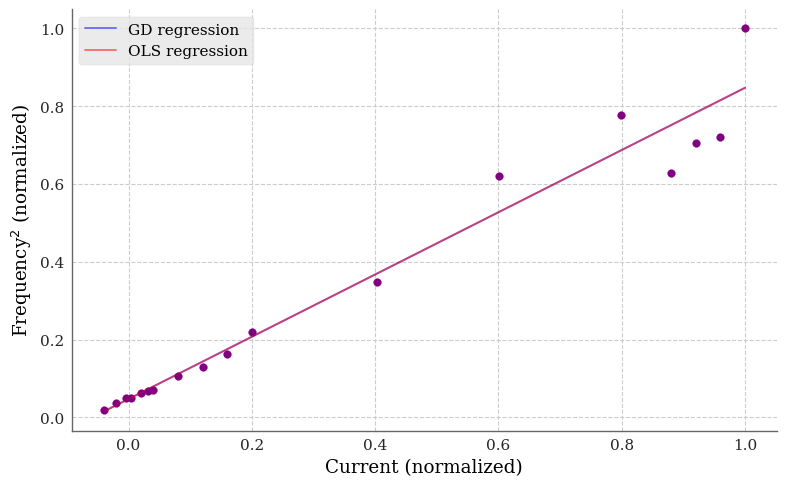

In [3]:
from matplotlib import pyplot as plt

config = {
'axes.spines.right': False,
'axes.spines.top': False,
'axes.edgecolor': '.4',
'axes.labelcolor': '.0',
'axes.titlesize': 'large',
'axes.labelsize': 'large',
'figure.autolayout': True,
'figure.figsize': (8, 5),
'font.family': ['serif'],
'font.size': 11.0,
'grid.linestyle': '--',
'legend.facecolor': '.9',
'legend.frameon': True,
'legend.fontsize': 'medium',
'savefig.transparent': True,
'text.color': '.0',
'xtick.labelsize': 'medium',
'ytick.labelsize': 'medium',
}

plt.style.use(['seaborn-v0_8-whitegrid', 'seaborn-v0_8-paper', 'seaborn-v0_8-muted', config])

fig, ax = plt.subplots()

ax.set_xlabel("Current (normalized)")
ax.set_ylabel("Frequency$^2$ (normalized)")
ax.scatter(x_data, y_data, color='purple')

X = np.linspace(min(x_data) / max(x_data), 1, num=50)
Y1 = gd_weights[0] + gd_weights[1] * X
Y2 = ols_weights[0] + ols_weights[1] * X

ax.plot(X, Y1, alpha=0.5, label="GD regression", color="blue")
ax.plot(X, Y2, alpha=0.5, label="OLS regression", color="red")

ax.legend()

Notice how the red and blue lines overlap to become purple. They are basically the same - looks like success to me!

### Stochastic Gradient Descent

Now, with a fairly small dataset like this, this isn't too bad. But if we had a very big dataset, each step in the iteration would take too long. How to deal with that?

Well, we are expecting *all* of the dataset to roughly fit the same pattern. So if we take a sizeable subset of it, and apply an iteration only to that subset, the step we take shouldn't be *too* bad. Of course, we wouldn't always pick the same subset: rather, it would be more interesting to pick random subsets of the full dataset so we still end up with something that represents the entirety of our data. This method is called *Stochastic Gradient Descent* (SGD).

Technically speaking, the "true" SGD is when you pick a *single* pattern to use during your step. But that is usually not desirable - most times, we'll take a sizable enough subset of the dataset, called a *mini-batch*.

In [4]:
def linear_regressionSGD(x_data, y_data, alpha = 1, batch_size = 10, n = 10):
    """Applies `n` iterations of SGD with a mini-batch size of `batch_size`"""
    # TODO
    
    

## Polynomials, overfitting, and underfitting
*__note:__ This next part is a bit rushed, as I wanted to get quickly onto other things, but there are important concepts here, like over/underfitting and regularization.*

Okay cool. We can do linear things. You might protest: "this is useless! Most things in the world are not linear!"

To that I say: "Yes, but we can *beat* them into being linear."

Say we've collected some data and are trying to find some relation between $x$ and $y$. But oh no! We've graphed the data and it is not linear. However, it does look like a cubic polynomial might describe it pretty well. What we can do, then, is use $\boldsymbol x = [1\; x\; x^2\; x^3]^\top$ as our input! If we have data on $x$, it'll be pretty trivial to generate patterns for $\boldsymbol x$. Then, we can apply our linear regression algorithms and boom! Got ourselves a cubic polynomial.

However, why stop at degree 3? Couldn't we find, say, a 10th degree polynomial that fits the data? Well...

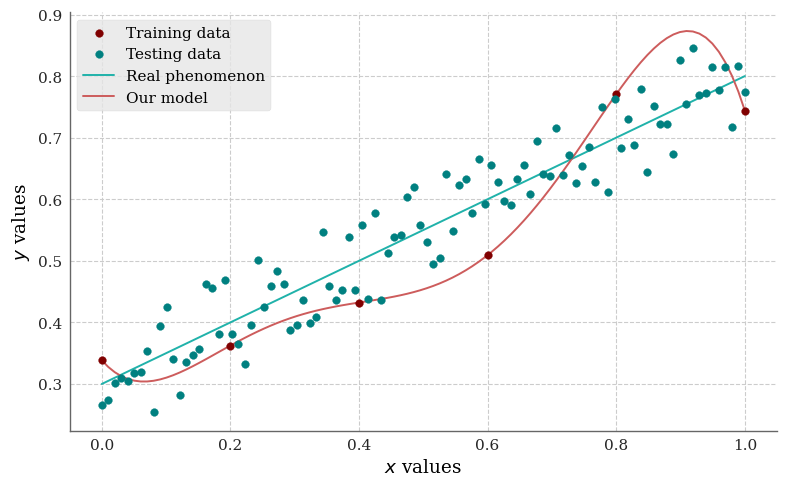

In [15]:
fig, ax = plt.subplots()
ax.set_ylabel("$y$ values")
ax.set_xlabel("$x$ values")

x_train = np.linspace(0, 1, num=6)
y_train = 0.5 * x_train + 0.3 + 0.05 * np.random.randn(6)
ax.scatter(x_train, y_train, label="Training data", color='maroon', zorder=10)
x_test = np.linspace(0, 1, num=100)
y_test = 0.5 * x_test + 0.3 + 0.05 * np.random.randn(100)
ax.scatter(x_test, y_test, label="Testing data", color='teal', zorder=10)

y_real = 0.5 * x_test + 0.3 
ax.plot(x_test, y_real, label="Real phenomenon", color='lightseagreen')

x_data = x_train.reshape(x_train.shape[0], 1)
x_data = np.concatenate((x_data, x_data**2, x_data**3, x_data**4, x_data**5), axis=1)
y_data = y_train.reshape(y_train.shape[0], 1)
w = linear_regressionOLS(x_data, y_data)

y_model = w[0] + w[1] * x_test + w[2] * x_test**2 + w[3] * x_test**3 + w[4] * x_test**4 + w[5] * x_test**5
ax.plot(x_test, y_model, label="Our model", color='indianred')

ax.legend()

While this is a contrived example, we can see that using a polynomial whose degree is too high might cause our data to *overfit* to the training data, and then poorly fit our testing data compared to a lower degree polynomial (in this case, a line would have been much better). Of course, if our data did represent something as complex as a fifth degree polynomial, a line would really *underfit* the data. So we always need to be careful when choosing what degree we will use for our polynomial fit. The degree can be seen as another hyperparameter.

A common way to avoid overfitting is adding some *regularization* term to our cost function. Usually, models with large parameters tend to generalize less well, so a common way to do avoid this is adding an extra term such as $\lambda||\boldsymbol w||^2$ to our cost function, which punishes large parameters. Note that here, $\lambda$ would be another hyperparameter, usually called a *regularization hyperparameter*.